# Non-Intersecting Polygon Drawing From Coordinates

## Problem Statement
Given a list of coordinates of size *n*, in a random order, draw a non-intersecting polygon passing through all the points.

## Sources
1. Stack Overflow - Create non-intersecting polygon passing through all given points : https://stackoverflow.com/questions/14263284/create-non-intersecting-polygon-passing-through-all-given-points/20623817#20623817
2. Left Turn Test : https://www.geeksforgeeks.org/direction-point-line-segment/


In [63]:
# Drawing related functions

from typing import List, Tuple
import matplotlib.pyplot as plt
from copy import deepcopy

def plot_coordinates(coordinates: List[List[int]],
                     figure: plt.figure = None,
                     axis: plt.axis = None,
                     marker : str = 'o',
                     color : str = 'r') -> Tuple[plt.figure, plt.axis]:
    """Plot coordinates from a list in a figure. If the figure is not passed, a new one is created.

    Args:
        coordinates (List[List[int]]): List of coordinates.
        figure (plt.figure, optional): Pyplot figure. Defaults to None. If None, create new figure.
        axis (plt.axis, optional): Pyplot axis. Defaults to None. If None, create new axis.
        marker (str, optional): Marker to be used in the figure. Defaults to 'o' (dot).
        color (str, optional): Color to be used in the figure. Defaults to 'r' (red).

    Returns:
        Tuple[plt.figure, plt.axis]: Returns the figure and axis used.
    """
    if not figure and not axis:
        figure, axis = plt.subplots()
    axis.plot(*zip(*coordinates), marker=marker, color=color, ls='')
    return figure, axis

def plot_polygon(coordinates: List[List[int]],
                 figure: plt.figure = None,
                 axis: plt.axis = None,
                 color : str = 'b',
                 plot_points: bool = True,
                 title: str = None) -> Tuple[plt.figure, plt.axis]:
    """Plot a filled polygon using the coordinates from a list in a figure.
    If the figure is not passed, a new one is created.

    Args:
        coordinates (List[List[int]]): List of coordinates.
        figure (plt.figure, optional): Pyplot figure. Defaults to None. If None, create new figure.
        axis (plt.axis, optional): Pyplot axis. Defaults to None. If None, create new axis.
        color (str, optional): Color to be used in the figure. Defaults to 'b' (blue).

    Returns:
        Tuple[plt.figure, plt.axis]: Returns the figure and axis used.
    """
    coordinates = deepcopy(coordinates)
    if not figure and not axis:
        figure, axis = plt.subplots()
    if not coordinates[0]==coordinates[-1]:
        coordinates.append(coordinates[0])
    axis.plot(*zip(*coordinates), color=color)
    axis.fill(*zip(*coordinates), color=color, alpha=0.5)
    if title:
        axis.set_title(title)
    if plot_points:
        figure, axis = plot_coordinates(coordinates, figure=figure, axis=axis)
    return figure, axis

In [70]:
# Algorithm to order a random list of coordinates to create a non-intersecting polygon

def left_turn_test(line: List[List[int]], point: List[int]) -> bool:
    """Test if a point is above/in the line or below it.

    The test is done using the following:
        Make first point of line as origin and do the crossproduct between the second point of 
        the line and the point desired.
        If the result is positive, number is above the line. If negative number is below the line.
        If the result is zero, number is in the line.

    Args:
        line (List[List[int]]): List of coordinates to define the line.
        point (List[int]): Point to be tested.

    Returns:
        bool: True if above/in the line, false if below.
    """

    line_point_1, line_point_2 = line
    cross_product = (line_point_2[0]-line_point_1[0]) * (point[1]-line_point_1[1]) - \
                    (line_point_2[1]-line_point_1[1]) * (point[0]-line_point_1[0])
    if cross_product >= 0:
        return True
    else:
        return False

def sort_polygon_coordinates(coordinates: List[List[int]]) -> List[List[int]]:
    """Sort a list of coordinates, so it is possible to draw a non-intersecting polygon.

    Algorithm:
        1. Find the leftmost points p
        2. Find the rightmost point q
        3. Partition the points into A, the set of points below pq, and B, the set of points above pq 
        [you can use the left turn test on (p,q,?) to determine if a point is above the line].
        4. Sort A by x-coordinate (increasing)
        5. Sort B by x-coordinate (decreasing).
        6. Return the polygon defined by p, the points in A, in order, q, the points of B in order.

    Args:
        coordinates (List[List[int]]): List of coordinates.

    Returns:
        List[List[int]]: Sorted list of coordinates.
    """
    x_ordered_coordinates = sorted(coordinates)
    left_most_point, right_most_point = x_ordered_coordinates[0], x_ordered_coordinates[-1]
    A, B = list(), list()
    for coordinate in x_ordered_coordinates:
        if left_turn_test((left_most_point, right_most_point), coordinate):
            A.append(coordinate)
        else:
            B.append(coordinate)
    B.sort(reverse=True)
    return [*A, *B]

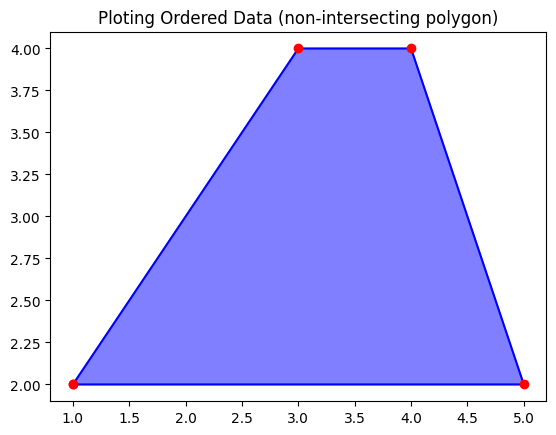

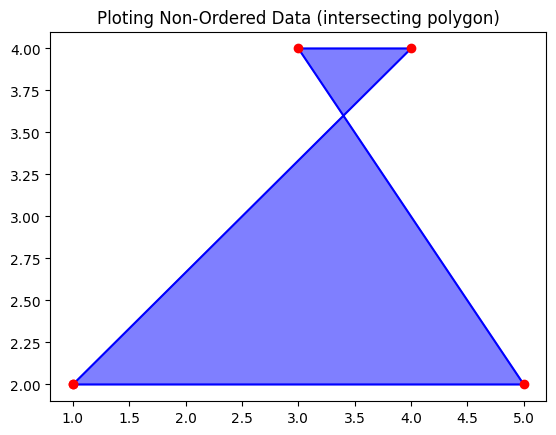

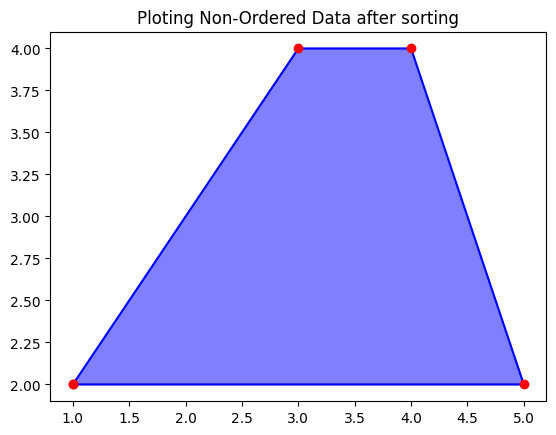

In [71]:
ordered_data = [[1,2],[3,4],[4,4],[5,2]]
non_ordered_data = [[1,2],[4,4],[3,4],[5,2]]

fig1, ax1 = plot_polygon(ordered_data, plot_points=True, title="Ploting Ordered Data (non-intersecting polygon)")
fig2, ax2 = plot_polygon(non_ordered_data, plot_points=True, title="Ploting Non-Ordered Data (intersecting polygon)")
fig3, ax3 = plot_polygon(sort_polygon_coordinates(non_ordered_data), plot_points=True, title="Ploting Non-Ordered Data after sorting")

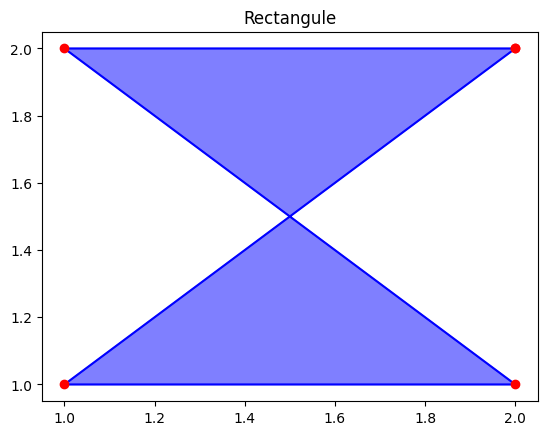

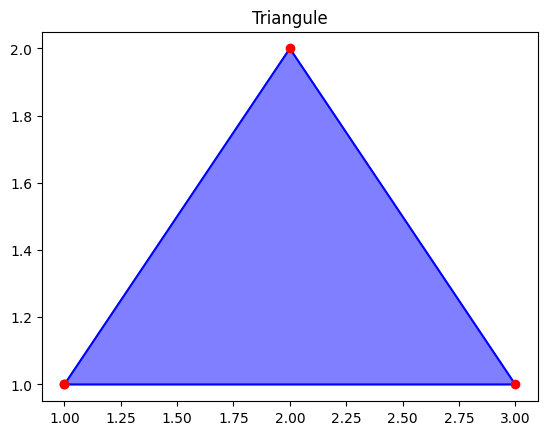

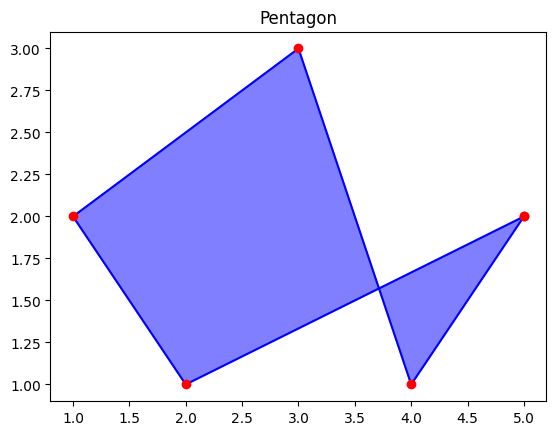

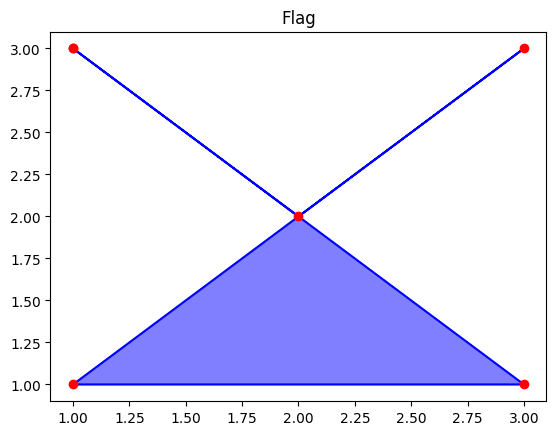

In [68]:
# Example of unordered prints

rectangle = [[2, 2], [1, 2], [2, 1], [1, 1]]
triangle = [[1, 1], [3, 1], [2, 2]]
pentagon = [[5, 2], [4, 1], [3, 3], [1, 2], [2, 1]]
flag = [[1, 3], [3, 1], [1, 1], [3, 3], [2, 2]]

fig_rec, ax_rec = plot_polygon(rectangle, plot_points=True, title="Rectangule")
fig_tri, ax_tri = plot_polygon(triangle, plot_points=True, title="Triangule")
fig_pent, ax_pent = plot_polygon(pentagon, plot_points=True, title="Pentagon")
fig_flag, ax_flag = plot_polygon(flag, plot_points=True, title="Flag")

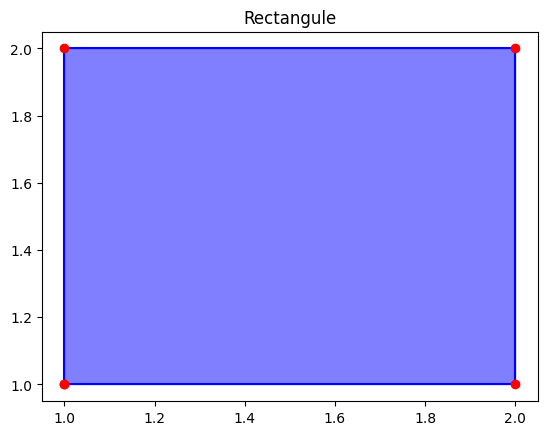

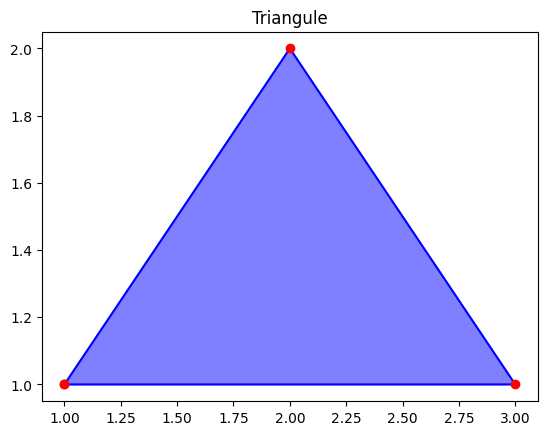

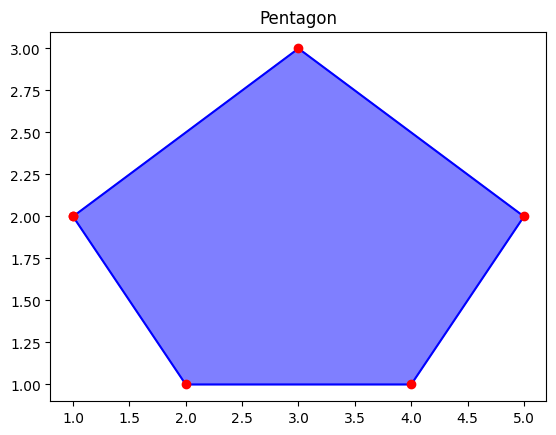

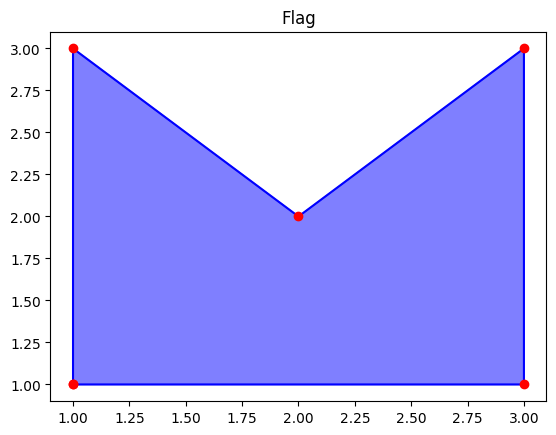

In [72]:
# Using algorithm to order the coordinates

fig_rec, ax_rec = plot_polygon(sort_polygon_coordinates(rectangle), plot_points=True, title="Rectangule")
fig_tri, ax_tri = plot_polygon(sort_polygon_coordinates(triangle), plot_points=True, title="Triangule")
fig_pent, ax_pent = plot_polygon(sort_polygon_coordinates(pentagon), plot_points=True, title="Pentagon")
fig_flag, ax_flag = plot_polygon(sort_polygon_coordinates(flag), plot_points=True, title="Flag")

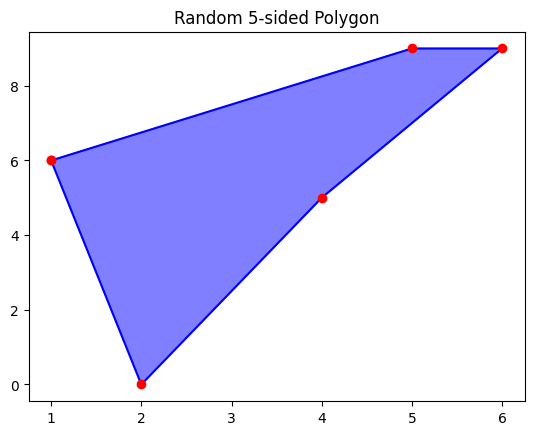

In [85]:
# Random Polygon Generation

import random

n_points = 5
coordinates = [[int(random.random()*10), int(random.random()*10)] for _ in range(n_points)]

fig_random, ax_random = plot_polygon(sort_polygon_coordinates(coordinates), plot_points=True, title=f"Random {n_points}-sided Polygon")